# HW4
> Indented block




## First

In [0]:
# import needed libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pylab import fill_between
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,BatchNormalization,Flatten,GlobalAveragePooling2D
from keras.optimizers import Adam, SGD, Adadelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
RANDOM_SEED = 6    # Set a random seed for reproducibility!

from patsy import dmatrices
import statsmodels.api as sm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler

In [0]:
def plotTrainingHist(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.legend(['Val_Loss', 'Loss'], loc='upper left')
  plt.title(regType + ': Val Loss:' + str(round(np.mean(history.history['val_loss']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def plotTrainingHist2(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['acc'])
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.legend(['Accuracy', 'Loss'], loc='upper left')
  plt.title(regType + ': Accuracy:' + str(round(np.mean(history.history['acc']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def plotTrainingHist3(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['acc'])
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.legend(['Accuracy', 'Loss'], loc='upper left')
  plt.title(regType + ': Accuracy:' + str(round(np.mean(history.history['acc']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def confMatrix(X_test, y_test, model, regType):
  y_pred1 = model.predict(X_test)
  y_pred = y_pred1.round(0)
  print(classification_report(y_test, y_pred))
  f, ax = plt.subplots(figsize=(13,8))
  model_y_pred1 = model.predict(X_test, verbose=1)
  model_y_pred= model_y_pred1.round(0)
  model_cm = confusion_matrix(y_test,model_y_pred,[0,1])
  sns.heatmap(model_cm, annot=True, fmt='g', cmap="RdBu", xticklabels = ["0", "1"] , yticklabels = ["0", "1"], ax=ax )
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(regType + ' : Confusion Matrix', fontsize=20)

def OneHot(category_df):
    df_dummy = pd.DataFrame()
    for col in category_df.columns:
        df_dummy = pd.concat([df_dummy, pd.get_dummies(category_df[col], drop_first=True, prefix = 'Is')], axis='columns')
    return df_dummy

def split(df):
	numerics = ['int64', 'float64']
	df_num = df.select_dtypes(include=numerics)
	df_cat = df.drop(df_num, axis='columns')
	print(df.shape, df_num.shape, df_cat.shape)
	return df_num, df_cat    

def classReport(X_test, y_test, model):
  y_pred1 = model.predict(X_test)
  y_pred = y_pred1.round(0)
  print(classification_report(y_test, y_pred))

# Styles for Plotting # 
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)


def plot_roc(y_true, y_score, label_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )
    return roc_auc_score(y_true, y_score)

def roc (y_eval1,y_eval2,y_preds1,y_preds2):
  y_eval1['num']='num'
  y_eval2['num']='num'
  y_eval_compiled = pd.merge(y_eval1, y_eval2, on='num').drop('num')
  y_preds1['num']='num'
  y_preds2['num']='num'
  y_pred_compiled = pd.merge(y_preds1, y_preds2, on='num').drop('num')

## IMDB Movie Review

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# The Embedding layer takes at least two arguments:
# the number of possible words in the vocabulary, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 32.
embedding_layer = layers.Embedding(1000, 32)

In [58]:
vocab_size = 10000
imdb = keras.datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [59]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [60]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [61]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 6740, 365, 1234, 5, 1156, 354, 11, 14, 5327, 6638, 7, 1016, 2, 5940, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 9363, 1117, 1831, 7485, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 8564, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 7175, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 5390, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [62]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[6]])
print('---label---')
print(y_train[6])

---review with words---
['the', 'boiled', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'murdering', 'naschy', 'br', 'villain', 'and', 'suggestion', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'concentrates', 'concept', 'issue', 'skeptical', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'starship', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'originals', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'dose', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of',

In [63]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [64]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [0]:
from keras.preprocessing import sequence
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GlobalAveragePooling1D
embedding_size=16

def baseline_model():
  model=Sequential()
  model.add(Embedding(vocab_size, embedding_size, input_length=max_words))
  #model.add(LSTM(100))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

### MODEL 1

In [67]:
first_model=baseline_model()
first_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
first_model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [69]:
first_history = first_model.fit(X_train, y_train, epochs=30,batch_size=512,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 1s 34us/step - loss: 0.6919 - accuracy: 0.5568 - val_loss: 0.6896 - val_accuracy: 0.6240
Epoch 2/30
20000/20000 [==============================] - 0s 24us/step - loss: 0.6860 - accuracy: 0.6223 - val_loss: 0.6798 - val_accuracy: 0.7398
Epoch 3/30
20000/20000 [==============================] - 0s 24us/step - loss: 0.6722 - accuracy: 0.7382 - val_loss: 0.6609 - val_accuracy: 0.6230
Epoch 4/30
20000/20000 [==============================] - 0s 24us/step - loss: 0.6483 - accuracy: 0.7355 - val_loss: 0.6303 - val_accuracy: 0.7804
Epoch 5/30
20000/20000 [==============================] - 0s 25us/step - loss: 0.6126 - accuracy: 0.7991 - val_loss: 0.5920 - val_accuracy: 0.7874
Epoch 6/30
20000/20000 [==============================] - 0s 24us/step - loss: 0.5692 - accuracy: 0.8191 - val_loss: 0.5487 - val_accuracy: 0.8194
Epoch 7/30
20000/20000 [==============================] - 0s 24us/ste

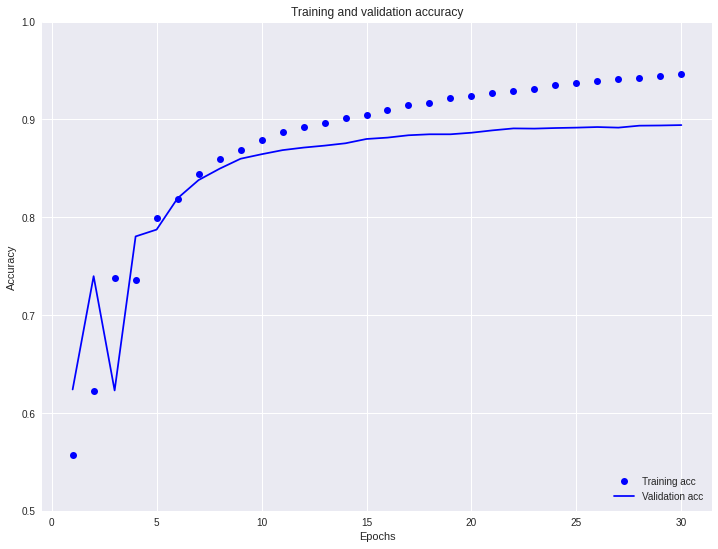

In [70]:
import matplotlib.pyplot as plt

acc = first_history.history['accuracy']
val_acc = first_history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))

plt.show()

### MODEL 2

In [0]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,GlobalAveragePooling1D
embedding_size=16
max_words = 500

def baseline_model2():
  model=Sequential()
  model.add(Embedding(vocab_size, embedding_size, input_length=max_words))
  model.add(Dense(16, activation='relu'))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [72]:
second_model=baseline_model2()
second_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
dense_17 (Dense)             (None, 500, 16)           272       
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 162,417
Trainable params: 162,417
Non-trainable params: 0
________________________________________________

In [0]:
second_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
second_history = second_model.fit(X_train, y_train, epochs=30,batch_size=512,validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 1s 44us/step - loss: 0.6928 - accuracy: 0.5195 - val_loss: 0.6923 - val_accuracy: 0.4944
Epoch 2/30
20000/20000 [==============================] - 1s 31us/step - loss: 0.6881 - accuracy: 0.5411 - val_loss: 0.6798 - val_accuracy: 0.5890
Epoch 3/30
20000/20000 [==============================] - 1s 30us/step - loss: 0.6512 - accuracy: 0.6878 - val_loss: 0.6007 - val_accuracy: 0.7708
Epoch 4/30
20000/20000 [==============================] - 1s 31us/step - loss: 0.5249 - accuracy: 0.8058 - val_loss: 0.4511 - val_accuracy: 0.8318
Epoch 5/30
20000/20000 [==============================] - 1s 30us/step - loss: 0.3780 - accuracy: 0.8613 - val_loss: 0.3610 - val_accuracy: 0.8590
Epoch 6/30
20000/20000 [==============================] - 1s 31us/step - loss: 0.3004 - accuracy: 0.8863 - val_loss: 0.3385 - val_accuracy: 0.8618
Epoch 7/30
20000/20000 [==============================] - 1s 32us/ste

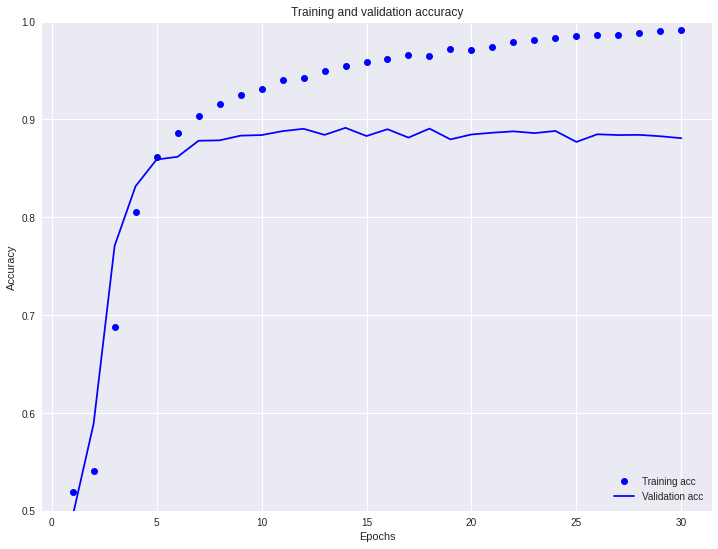

In [75]:
import matplotlib.pyplot as plt

acc = second_history.history['accuracy']
val_acc = second_history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))

plt.show()

In [76]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


## IMDB Sentiment

In [0]:
import numpy as np
import pandas as pd
import os
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### Data Cleaning and Preprocessing

In [152]:
train=pd.read_csv('train.csv')
XX_train=pd.read_csv('train.csv')
train

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0
...,...,...
24995,"My comments may be a bit of a spoiler, for wha...",1
24996,"The ""saucy"" misadventures of four au pairs who...",1
24997,"Oh, those Italians! Assuming that movies about...",1
24998,Eight academy nominations? It's beyond belief....,1


In [153]:
test=pd.read_csv('test.csv')
XX_test=pd.read_csv('test.csv')
test

,text
0,This movie was horrible. If it had never been ...
1,The director infuses this film with false dept...
2,"I don't get it! The teenage leads in ""Horror S..."
3,"This is the fifth part of 'The Animatrix', a c..."
4,I was very impressed with with this film which...
...,...
10996,In the wake of my personal research into the p...
10997,I had a bit of hope for this hour long film ma...
10998,Having been pleasantly surprised by Sandra Bul...
10999,"Elfriede Jelinek, not quite a household name y..."


In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [155]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11000 non-null  object
dtypes: object(1)
memory usage: 86.1+ KB


In [156]:
np.shape(test)

(11001, 1)

In [157]:
np.shape(train)

(25000, 2)

In [0]:
#Removing punctuations from entire dataset
import string
punc_set = string.punctuation
punc_set

#Function for removing punctions
def remove_punc(text):
    clean = "".join([x.lower() for x in text if x not in punc_set])
    return clean

#Applying the 'remove_punc' function to entire dataset
train['no_punc'] = train['text'].apply(lambda z:remove_punc(z))

In [159]:
train

,text,sentiment,no_punc
0,For a movie that gets no respect there sure ar...,0,for a movie that gets no respect there sure ar...
1,Bizarre horror movie filled with famous faces ...,0,bizarre horror movie filled with famous faces ...
2,"A solid, if unremarkable film. Matthau, as Ein...",0,a solid if unremarkable film matthau as einste...
3,It's a strange feeling to sit alone in a theat...,0,its a strange feeling to sit alone in a theate...
4,"You probably all already know this by now, but...",0,you probably all already know this by now but ...
...,...,...,...
24995,"My comments may be a bit of a spoiler, for wha...",1,my comments may be a bit of a spoiler for what...
24996,"The ""saucy"" misadventures of four au pairs who...",1,the saucy misadventures of four au pairs who a...
24997,"Oh, those Italians! Assuming that movies about...",1,oh those italians assuming that movies about a...
24998,Eight academy nominations? It's beyond belief....,1,eight academy nominations its beyond belief i ...


In [0]:
test['text'] = test['text'].astype(str)

In [0]:
test['no_punc'] = test['text'].apply(lambda z:remove_punc(z))

In [162]:
train

,text,sentiment,no_punc
0,For a movie that gets no respect there sure ar...,0,for a movie that gets no respect there sure ar...
1,Bizarre horror movie filled with famous faces ...,0,bizarre horror movie filled with famous faces ...
2,"A solid, if unremarkable film. Matthau, as Ein...",0,a solid if unremarkable film matthau as einste...
3,It's a strange feeling to sit alone in a theat...,0,its a strange feeling to sit alone in a theate...
4,"You probably all already know this by now, but...",0,you probably all already know this by now but ...
...,...,...,...
24995,"My comments may be a bit of a spoiler, for wha...",1,my comments may be a bit of a spoiler for what...
24996,"The ""saucy"" misadventures of four au pairs who...",1,the saucy misadventures of four au pairs who a...
24997,"Oh, those Italians! Assuming that movies about...",1,oh those italians assuming that movies about a...
24998,Eight academy nominations? It's beyond belief....,1,eight academy nominations its beyond belief i ...


In [163]:
test

,text,no_punc
0,This movie was horrible. If it had never been ...,this movie was horrible if it had never been m...
1,The director infuses this film with false dept...,the director infuses this film with false dept...
2,"I don't get it! The teenage leads in ""Horror S...",i dont get it the teenage leads in horror star...
3,"This is the fifth part of 'The Animatrix', a c...",this is the fifth part of the animatrix a coll...
4,I was very impressed with with this film which...,i was very impressed with with this film which...
...,...,...
10996,In the wake of my personal research into the p...,in the wake of my personal research into the p...
10997,I had a bit of hope for this hour long film ma...,i had a bit of hope for this hour long film ma...
10998,Having been pleasantly surprised by Sandra Bul...,having been pleasantly surprised by sandra bul...
10999,"Elfriede Jelinek, not quite a household name y...",elfriede jelinek not quite a household name ye...


In [164]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
def tokenize(text):
    tokens = re.split("\W+",text)
    return tokens

train['tokenized_Data'] = train['no_punc'].apply(lambda z:tokenize(z))
test['tokenized_Data'] = test['no_punc'].apply(lambda z:tokenize(z))

stopwords = nltk.corpus.stopwords.words('english')

In [0]:
def remove_stopwords(tokenized_words):
    Ligit_text=[word for word in tokenized_words if word not in stopwords]
    return Ligit_text

train["no_stop"] = train["tokenized_Data"].apply(lambda z:remove_stopwords(z))
test["no_stop"] = test["tokenized_Data"].apply(lambda z:remove_stopwords(z))

In [167]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
wnl = nltk.wordnet.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    lemma = [wnl.lemmatize(word) for word in tokenized_text]
    return lemma
   
train['lemmatized'] = train['no_stop'].apply(lambda z:lemmatizing(z))
test['lemmatized'] = test['no_stop'].apply(lambda z:lemmatizing(z))

In [169]:
train['lemmatized'] = [" ".join(text) for text in train['lemmatized'].values]

train.head()

,text,sentiment,no_punc,tokenized_Data,no_stop,lemmatized
0,For a movie that gets no respect there sure ar...,0,for a movie that gets no respect there sure ar...,"[for, a, movie, that, gets, no, respect, there...","[movie, gets, respect, sure, lot, memorable, q...",movie get respect sure lot memorable quote lis...
1,Bizarre horror movie filled with famous faces ...,0,bizarre horror movie filled with famous faces ...,"[bizarre, horror, movie, filled, with, famous,...","[bizarre, horror, movie, filled, famous, faces...",bizarre horror movie filled famous face stolen...
2,"A solid, if unremarkable film. Matthau, as Ein...",0,a solid if unremarkable film matthau as einste...,"[a, solid, if, unremarkable, film, matthau, as...","[solid, unremarkable, film, matthau, einstein,...",solid unremarkable film matthau einstein wonde...
3,It's a strange feeling to sit alone in a theat...,0,its a strange feeling to sit alone in a theate...,"[its, a, strange, feeling, to, sit, alone, in,...","[strange, feeling, sit, alone, theater, occupi...",strange feeling sit alone theater occupied par...
4,"You probably all already know this by now, but...",0,you probably all already know this by now but ...,"[you, probably, all, already, know, this, by, ...","[probably, already, know, 5, additional, episo...",probably already know 5 additional episode nev...


In [170]:
test['lemmatized'] = [" ".join(text) for text in test['lemmatized'].values]

test.head()

,text,no_punc,tokenized_Data,no_stop,lemmatized
0,This movie was horrible. If it had never been ...,this movie was horrible if it had never been m...,"[this, movie, was, horrible, if, it, had, neve...","[movie, horrible, never, made, world, would, b...",movie horrible never made world would better p...
1,The director infuses this film with false dept...,the director infuses this film with false dept...,"[the, director, infuses, this, film, with, fal...","[director, infuses, film, false, depth, repeat...",director infuses film false depth repeating gi...
2,"I don't get it! The teenage leads in ""Horror S...",i dont get it the teenage leads in horror star...,"[i, dont, get, it, the, teenage, leads, in, ho...","[dont, get, teenage, leads, horror, star, supp...",dont get teenage lead horror star supposedly d...
3,"This is the fifth part of 'The Animatrix', a c...",this is the fifth part of the animatrix a coll...,"[this, is, the, fifth, part, of, the, animatri...","[fifth, part, animatrix, collection, animated,...",fifth part animatrix collection animated short...
4,I was very impressed with with this film which...,i was very impressed with with this film which...,"[i, was, very, impressed, with, with, this, fi...","[impressed, film, directed, luigi, bazzoni, st...",impressed film directed luigi bazzoni story yo...


In [0]:
X = train['lemmatized']
y = train['sentiment']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=273, stratify=y)

In [173]:
np.shape(X_test)

(7500,)

In [179]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

word_index = 0
max_features = 500
maxlen = 80
batch_size = 500

tokenizer = Tokenizer(num_words=500)

#build the vocab. :
tokenizer.fit_on_texts(X_train)

x_tn = tokenizer.texts_to_sequences(X_train)
x_tt = tokenizer.texts_to_sequences(X_test)

x_tn = sequence.pad_sequences(x_tn, maxlen=max_words)
x_tt = sequence.pad_sequences(x_tt, maxlen=max_words)

text = tokenizer.texts_to_matrix(X_train, mode='binary') 
sentiment = tokenizer.texts_to_matrix(X_test, mode='binary') 

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 84073 unique tokens.


In [0]:
np.shape(text)

#### Model Testing

Predicting the Sentiment From Model #1

In [0]:
IMDB_SENTIMENT_1= first_model.predict(text)

In [0]:
IMDB_SENTIMENT_1=pd.DataFrame(IMDB_SENTIMENT_1)

In [217]:
IMDB_SENTIMENT_1

,0
0,0.000474
1,0.120154
2,0.087029
3,0.120154
4,0.000743
...,...
7495,0.062388
7496,0.020267
7497,0.028782
7498,0.031403


Predicting the Sentiment From Model #2

In [0]:
IMDB_SENTIMENT_2= second_model.predict(text)

In [0]:
IMDB_SENTIMENT_2=pd.DataFrame(IMDB_SENTIMENT_2)

In [214]:
IMDB_SENTIMENT_2

,0
0,0.003852
1,0.021247
2,0.004107
3,0.004107
4,0.000677
...,...
17495,0.003612
17496,0.026761
17497,0.015136
17498,0.004393


## Amazon Review: Sports and Outdoors

In [0]:
! head -10 Movies_and_TV_5.json

In [0]:
import gzip

In [0]:
# Code provided via http://jmcauley.ucsd.edu/data/amazon/

def parse_gz(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def convert_to_DF(path):
    i = 0
    df = {}
    for d in parse_gz(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [0]:
sports_outdoors = convert_to_DF('reviews_Sports_and_Outdoors_5.json.gz')

In [254]:
print('Dataset size: {:,} words'.format(len(sports_outdoors)))

Dataset size: 296,337 words


In [255]:
sports_outdoors[:3]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,"02 28, 2012"


In [0]:
sports_outdoors["reviewTime"] = pd.to_datetime(sports_outdoors["reviewTime"])

In [0]:
sports_outdoors = sports_outdoors[['asin', 'summary', 'reviewText', 'overall', 'reviewerID', 'reviewerName', 'helpful', 'reviewTime',
      'unixReviewTime']]

In [257]:
sports_outdoors.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,2014-01-26
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,2012-02-02
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,2012-02-28
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4.0,It's a punch with a Glock logo.,1328400000,2012-02-05
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4.0,"Ok,tool does what a regular punch does.",1366675200,2013-04-23


Consider column sports_outdoors['reviewText'] as the meain feature and sports_outdoors['overall'] as the target of the prediction.


### Data Preprocessing

In [236]:
sports_outdoors['reviewText'][:11]

0     This came in on time and I am veru happy with ...
1     I had a factory Glock tool that I was using fo...
2     If you don't have a 3/32 punch or would like t...
3     This works no better than any 3/32 punch you w...
4     I purchased this thinking maybe I need a speci...
5     Needed this tool to really break down my G22, ...
6     If u don't have it .. Get it. All you need to ...
7     This light will no doubt capture the attention...
8     Light and laser torch work well, very bright. ...
9     Does everything it says it will do. I would li...
10    Very bright.  I would recommend this lite to a...
Name: reviewText, dtype: object

In [0]:
reviews = sports_outdoors['reviewText']

In [269]:
reviews

0         This came in on time and I am veru happy with ...
1         I had a factory Glock tool that I was using fo...
2         If you don't have a 3/32 punch or would like t...
3         This works no better than any 3/32 punch you w...
4         I purchased this thinking maybe I need a speci...
                                ...                        
296332    This is a water bottle done right. It is a ver...
296333    If you're looking for an insulated water bottl...
296334    This Hydracentials Sporty 25 OZ, double insula...
296335    As usual I received this item free in exchange...
296336    Hydracentials insulated 25 oz water bottle.Thi...
Name: reviewText, Length: 296337, dtype: object

In [276]:
reviews = pd.DataFrame(reviews)
reviews

,reviewText
0,This came in on time and I am veru happy with ...
1,I had a factory Glock tool that I was using fo...
2,If you don't have a 3/32 punch or would like t...
3,This works no better than any 3/32 punch you w...
4,I purchased this thinking maybe I need a speci...
...,...
296332,This is a water bottle done right. It is a ver...
296333,If you're looking for an insulated water bottl...
296334,"This Hydracentials Sporty 25 OZ, double insula..."
296335,As usual I received this item free in exchange...


In [0]:
def remove_punc(text):
    clean = "".join([x.lower() for x in text if x not in punc_set])
    return clean

reviews['reviewText'] = reviews['reviewText'].apply(lambda z:remove_punc(z))

In [0]:
def tokenize(text):
    tokens = re.split("\W+",text)
    return tokens

#Applying the 'tokenize' function to entire dataset
reviews['reviewText'] = reviews['reviewText'].apply(lambda z:tokenize(z))

In [0]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_words):
    Ligit_text=[word for word in tokenized_words if word not in stopwords]
    return Ligit_text

reviews['reviewText'] = reviews['reviewText'].apply(lambda z:remove_stopwords(z))

In [0]:
wnl = nltk.wordnet.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    lemma = [wnl.lemmatize(word) for word in tokenized_text]
    return lemma
    
reviews['reviewText'] = reviews['reviewText'].apply(lambda z:lemmatizing(z))

In [282]:
reviews

,reviewText
0,"[came, time, veru, happy, haved, used, already..."
1,"[factory, glock, tool, using, glock, 26, 27, 1..."
2,"[dont, 332, punch, would, like, one, glock, ba..."
3,"[work, better, 332, punch, would, find, hardwa..."
4,"[purchased, thinking, maybe, need, special, to..."
...,...
296332,"[water, bottle, done, right, nice, looking, do..."
296333,"[youre, looking, insulated, water, bottle, hol..."
296334,"[hydracentials, sporty, 25, oz, double, insula..."
296335,"[usual, received, item, free, exchange, review..."


Sentiment Modelling

     Negative reviews:      1-3 Stars  = 0
     Positive reviews:      4-5 Stars  = 1

In [0]:
sports_outdoors['pos_neg'] = [1 if x > 3 else 0 for x in sports_outdoors.overall]

In [245]:
sports_outdoors.head(3)

,asin,summary,reviewText,overall,reviewerID,reviewerName,helpful,reviewTime,unixReviewTime,pos_neg
0,1881509818,Woks very good,This came in on time and I am veru happy with ...,5.0,AIXZKN4ACSKI,David Briner,"[0, 0]",2014-01-26,1390694400,1
1,1881509818,Works as well as the factory tool,I had a factory Glock tool that I was using fo...,5.0,A1L5P841VIO02V,Jason A. Kramer,"[1, 1]",2012-02-02,1328140800,1
2,1881509818,"It's a punch, that's all.",If you don't have a 3/32 punch or would like t...,4.0,AB2W04NI4OEAD,J. Fernald,"[2, 2]",2012-02-28,1330387200,1


In [0]:
sports_outdoors["reviewText"] = reviews

In [285]:
sports_outdoors

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,pos_neg
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]","[came, time, veru, happy, haved, used, already...",5.0,Woks very good,1390694400,2014-01-26,1
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]","[factory, glock, tool, using, glock, 26, 27, 1...",5.0,Works as well as the factory tool,1328140800,2012-02-02,1
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]","[dont, 332, punch, would, like, one, glock, ba...",4.0,"It's a punch, that's all.",1330387200,2012-02-28,1
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]","[work, better, 332, punch, would, find, hardwa...",4.0,It's a punch with a Glock logo.,1328400000,2012-02-05,1
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]","[purchased, thinking, maybe, need, special, to...",4.0,"Ok,tool does what a regular punch does.",1366675200,2013-04-23,1
...,...,...,...,...,...,...,...,...,...,...
296332,A2XX2A4OJCDNLZ,B00LFPS0CY,RatherLiveInKeyWest,"[2, 3]","[water, bottle, done, right, nice, looking, do...",5.0,Hydracentials Sporty 25 Oz Stainless Steel Wat...,1405036800,2014-07-11,1
296333,A3LGT6UZL99IW1,B00LFPS0CY,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[0, 0]","[youre, looking, insulated, water, bottle, hol...",5.0,"Large, incredibly well made water bottle!",1405641600,2014-07-18,1
296334,ASKZO80Z1RKTR,B00LFPS0CY,Robin Lee,"[0, 0]","[hydracentials, sporty, 25, oz, double, insula...",5.0,"""Great Water Bottle For Hot Day""......",1405900800,2014-07-21,1
296335,APRNS6DB68LLV,B00LFPS0CY,"Rob Slaven ""slavenrm@gmail. com""","[1, 1]","[usual, received, item, free, exchange, review...",5.0,A pretty impressive water bottle. Best I've s...,1405900800,2014-07-21,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(sports_outdoors.reviewText, sports_outdoors.pos_neg, random_state=0)

In [287]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

word_index = 0
max_features = 500
maxlen = 80
batch_size = 500

tokenizer = Tokenizer(num_words=500)

#build the vocab. :
tokenizer.fit_on_texts(X_train)

x_tn = tokenizer.texts_to_sequences(X_train)
x_tt = tokenizer.texts_to_sequences(X_test)

x_tn = sequence.pad_sequences(x_tn, maxlen=max_words)
x_tt = sequence.pad_sequences(x_tt, maxlen=max_words)

reviewText = tokenizer.texts_to_matrix(X_train, mode='binary') 
review = tokenizer.texts_to_matrix(X_test, mode='binary') 

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 250742 unique tokens.


#### Model Testing

Predicting the Sentiment From Model #1

In [0]:
AMAZON_SENTIMENT_1= first_model.predict(review)

In [0]:
AMAZON_SENTIMENT_1=pd.DataFrame(AMAZON_SENTIMENT_1)

In [293]:
AMAZON_SENTIMENT_1

,0
0,0.218917
1,0.176302
2,0.052665
3,0.407755
4,0.067857
...,...
74080,0.386244
74081,0.305208
74082,0.163628
74083,0.234672


Predicting the Sentiment From Model #2

In [0]:
AMAZON_SENTIMENT_2= second_model.predict(review)

In [0]:
AMAZON_SENTIMENT_2=pd.DataFrame(AMAZON_SENTIMENT_2)

In [300]:
AMAZON_SENTIMENT_2

,0
0,0.035232
1,0.018696
2,0.004718
3,0.384042
4,0.005941
...,...
74080,0.319477
74081,0.131110
74082,0.016824
74083,0.046257
